<a href="https://colab.research.google.com/github/nkada/.com/blob/master/module3/Module3_Demo1_Using_One_Hot_Encodings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using One Hot Encodings

First let's import all neccesary packages and download the data

In [1]:
!pip install textblob

In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob, Word
import nltk
import seaborn as sns
nltk.download('punkt_tab')

%matplotlib inline
sns.set(rc={'figure.figsize':(20,20)})
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [4]:
%%writefile get_data.sh
if [ ! -f yelp.csv ]; then
  wget https://raw.githubusercontent.com/axel-sirota/implement-nlp-word-embedding/main/module3/data/yelp.csv
fi

Writing get_data.sh


In [5]:
!bash get_data.sh

--2024-12-19 14:48:54--  https://raw.githubusercontent.com/axel-sirota/implement-nlp-word-embedding/main/module3/data/yelp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8091185 (7.7M) [text/plain]
Saving to: ‘yelp.csv’

yelp.csv            100%[===================>]   7.72M  --.-KB/s    in 0.08s   

2024-12-19 14:48:54 (100 MB/s) - ‘yelp.csv’ saved [8091185/8091185]



Let's load the data and construct our corpus based on the first 3 reviews

In [6]:
path = './yelp.csv'
yelp = pd.read_csv(path)
yelp

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [7]:
first_reviews = yelp.text[:3].values
first_reviews

array(['My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!',
       'I have no idea why some people give bad reviews about this place. It goes to show 

In [13]:
corpus = []
for sentence in first_reviews:
  number_of_words = 0
  words = []
  sentence_blob = TextBlob(sentence)
  for word in sentence_blob.words:
    number_of_words += 1
    words.append(word)
    if number_of_words >10:
      break
  corpus.append(' '.join(words))
corpus

['My wife took me here on my birthday for breakfast and',
 'I have no idea why some people give bad reviews about',
 'love the gyro plate Rice is so good and I also']

In [14]:
vocabulary = set()
for sentence in corpus:
  for word in TextBlob(sentence).words:
    vocabulary.add(word)

In [15]:
one_hot_vectorizer = CountVectorizer()
one_hot_representation = one_hot_vectorizer.fit_transform(corpus).toarray()
one_hot_representation

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 0]])

<Axes: >

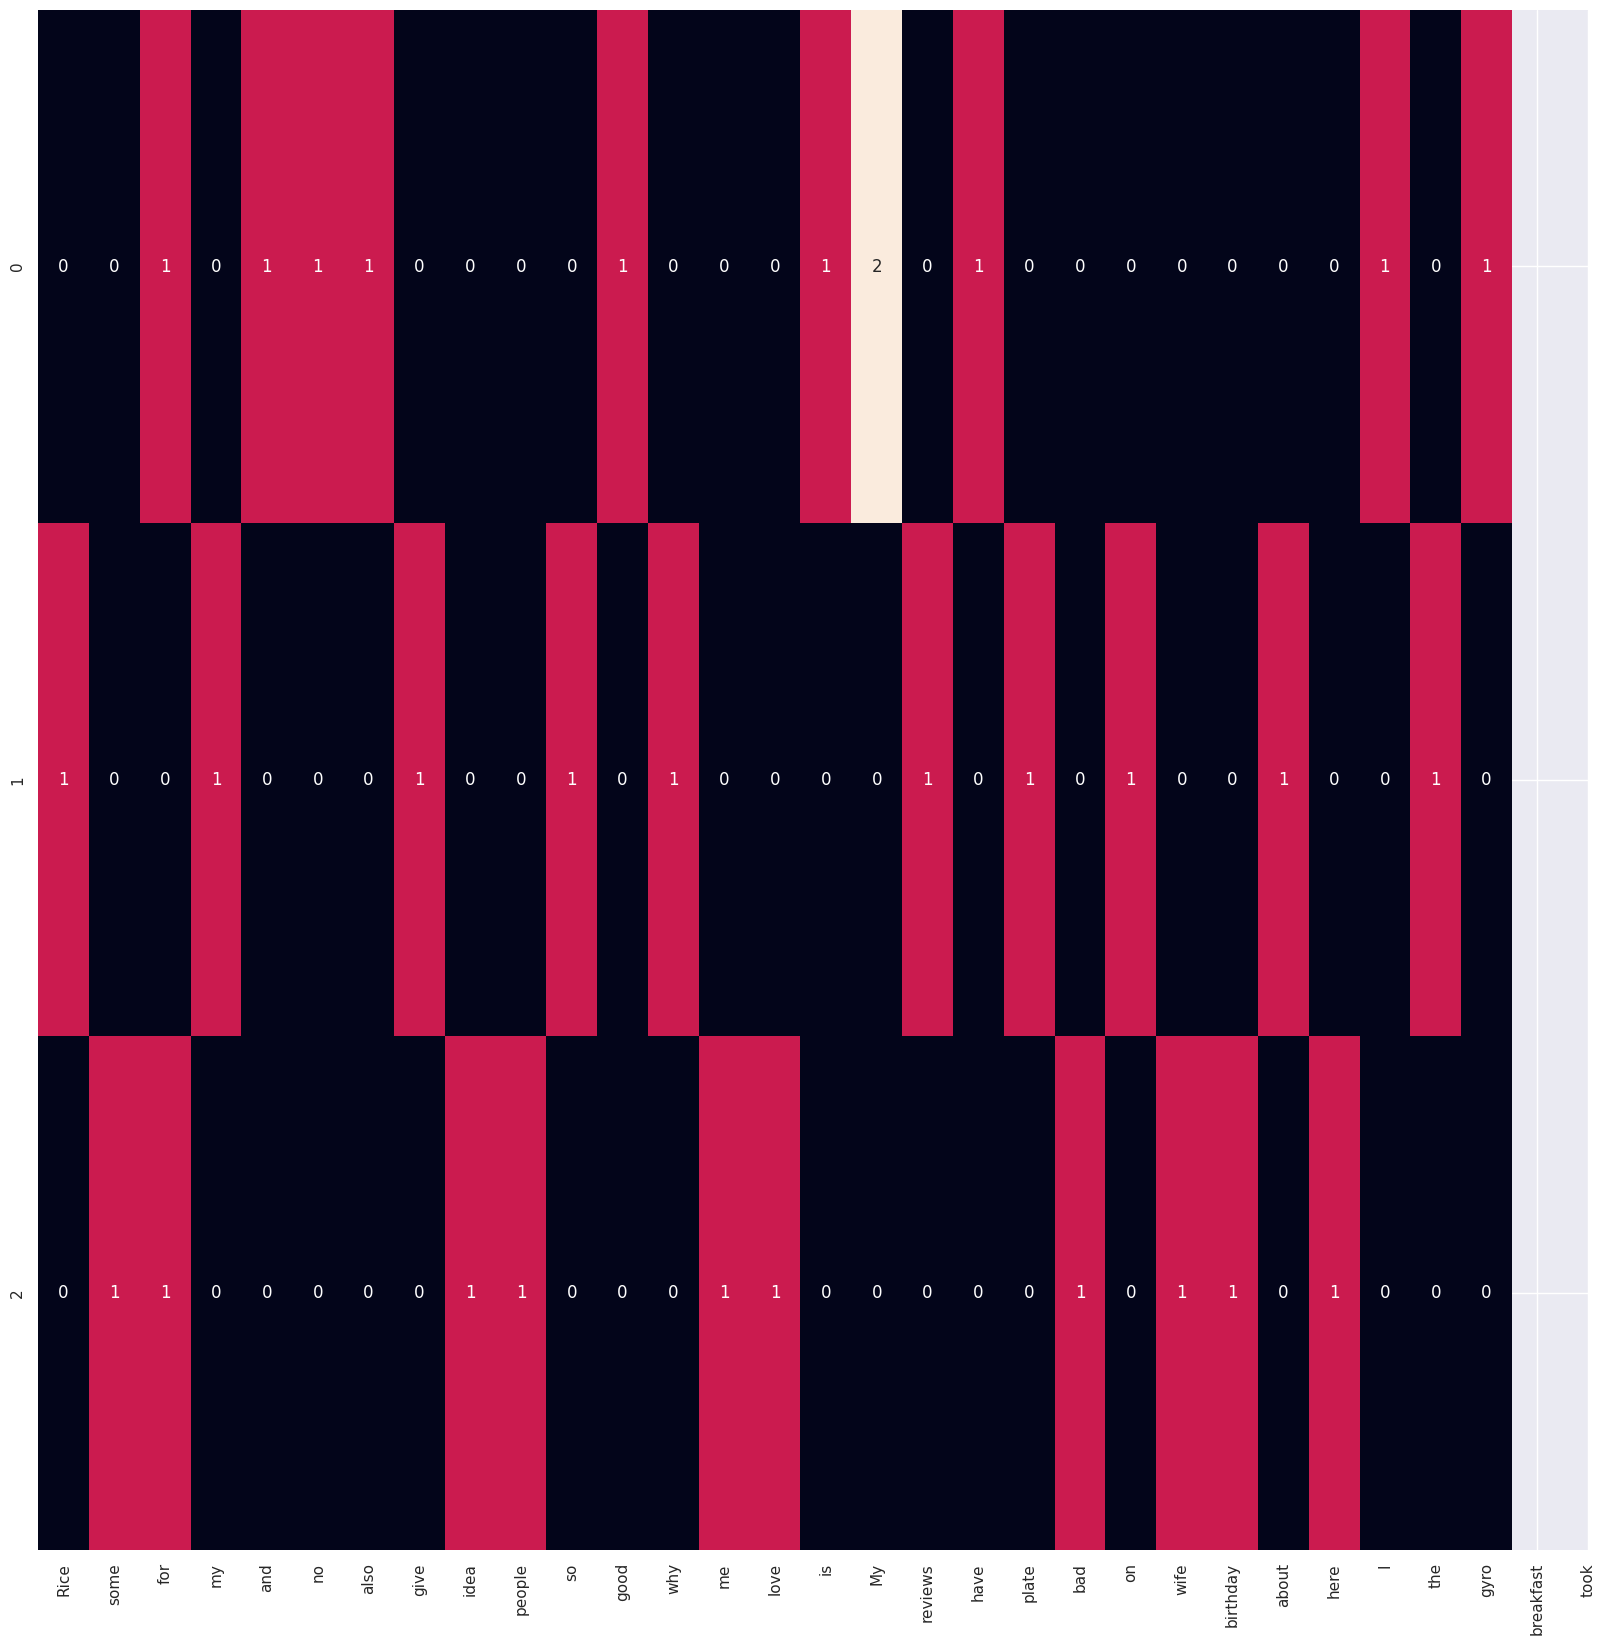

In [16]:
import seaborn as sns
sns.heatmap(one_hot_representation, annot=True, xticklabels=vocabulary, cbar=False)

As you can tell, even with trimmed versions of 3 reviews we exploded the size of our vocabulary and the resulting embedding is already quite sparse and big.

## Creating the final OHE embedding and evaluate analogies

Let's now load the final representation

In [17]:
corpus = yelp.text.values

In [19]:
vect = CountVectorizer()
ohe_rep = vect.fit_transform(corpus)
features = vect.get_feature_names_out()

In [20]:
features[:20]

array(['00', '000', '007', '00a', '00am', '00pm', '01', '02', '03',
       '03342', '04', '05', '06', '07', '08', '09',
       '0buxoc0crqjpvkezo3bqog', '0l', '0tzg', '10'], dtype=object)

In [21]:
ohe_rep.shape

(10000, 29185)

In [22]:
'good' in features

True

In [23]:
'excellent' in features

True

In [25]:
good_vector = np.zeros(ohe_rep.shape[1])
# Use np.where to find the index of 'good' in the features array
good_index = np.where(features == 'good')[0][0]
good_vector[good_index] = 1
good_vector

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
excellent_vector = np.zeros(ohe_rep.shape[1])
excellent_index = np.where(features == 'excellent')[0][0]
excellent_vector[excellent_index] = 1
excellent_vector

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
np.inner(good_vector.T, excellent_vector)

0.0

Even though *good* and *excellent* are related words and they should have some resemblance in our embedding, they don't in OHE. That is partially the reason why we will study better embeddings.